<a href="https://colab.research.google.com/github/RenanAbreuC/Demographic-Loan-Analysis-/blob/main/Demographic_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Análise Demográfica de Empréstimos**

Elaborado por [Renan Abreu](https://www.linkedin.com/in/renanabreuc/).

Data 07/02/2025

## **Introdução**

### **Contextualização do Problema:**

A análise demográfica dos solicitantes de empréstimos é fundamental, pois permite entender quem são os clientes e quais perfis têm maior probabilidade de aprovação ou reprovação. Isso ajuda as instituições financeiras na identificação de padrões, personalização de produtos, melhoria em campanhas de marketing, otimização de suas políticas de crédito, entre outros.

### **Objetivo do Projeto:**

Entender e analisar o perfil dos solicitantes de empréstimo com base em **gênero**, **estado civil**, **número de dependentes** e **nível educacional**, a fim de identificar os padrões e as chances que cada grupo tem de aprovação de empréstimo.

## **Preparação**

Foi utilizado o dataset "Loan Data Set" para este projeto, no qual possui dados de solicitantes de empréstimos. Além disso, foram importadas as bibliotecas NumPy, Pandas, Matplotlib e Seaborn para realizar uma análise eficiente dos dados.

In [ ]:
# Importando bibliotecas
import numpy as np                                                              # Biblioteca para operações númericas
import pandas as pd                                                             # Biblioteca para manipulação de dados
import matplotlib.pyplot as plt                                                 # Biblioteca para criação de gráficos
import seaborn as sns                                                           # Biblioteca para visualizações estatísticas

# Baixando o dataset (coleção de dados de solicitantes de empréstimos)
!gdown 1M8JTBzRKF_q8Pw-YZ5cSybJ-eZOzcEHX                                        # Baixando o dataset a aprtir de um link do Google Drive
df = pd.read_csv("loan_data_set.csv")                                           # Carregando o dataset no DataFrame

Downloading...
From: https://drive.google.com/uc?id=1M8JTBzRKF_q8Pw-YZ5cSybJ-eZOzcEHX
To: /content/loan_data_set.csv
100% 38.0k/38.0k [00:00<00:00, 43.9MB/s]


In [ ]:
# Primeiras linhas do dataset para uma visão geral dos dados
df.head()                                                                       # Retorna as primeiras 5 linhas do DataFrame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Informações do dataset (como colunas, tipos de dados e valores não nulos)
df.info()                                                                       # Retorna informações gerais sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Quantidade de linhas e de colunas do dataset
df.shape                                                                        # Retorna uma tupla com o número de linhas e colunas do DataFrame

(614, 13)

## **Processamento**

Durante o processamento, foi realizada a limpeza dos dados e o tratamento de valores nulos, seguindo os seguintes passos:

- Exclusão de colunas irrelevantes para a análise, sendo elas: *Loan_ID* (ID do empréstimo), *Self_Employed* (empregado Independente), *ApplicantIncome* (renda do solicitante), *CoapplicantIncome* (renda complementar), *LoanAmount* (valor do empréstimo), *Loan_Amount_Term* (prazo do empréstimo), *Credit_History* (histórico do crédito) e *Property_Area* (área da propriedade).

- Preenchimento dos valores nulos com dados relevantes. Nas colunas *Gender* (gênero) e *Dependents* (dependentes), os valores nulos foram preenchidos pelo valor modal dessas colunas. Na coluna *Married* (casado), os dados nulos foram substituídos pela *string* "Não".

Desta forma, todas as informações faltantes foram completadas.

In [ ]:
# Exclusão de colunas irrelavantes para a análise
df = df.drop(columns=[                                                          # Remove as colunas do DataFrame
    "Loan_ID",
    "Self_Employed",
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
    "Property_Area"])

In [ ]:
# Verificação de colunas com dados nulos
for col in df.columns:
    print(f"Qntde de dados nulos na coluna {col}: {df[col].isnull().sum()}")    # Imprime soma dos valores nulos

Qntde de dados nulos na coluna Gender: 13
Qntde de dados nulos na coluna Married: 3
Qntde de dados nulos na coluna Dependents: 15
Qntde de dados nulos na coluna Education: 0
Qntde de dados nulos na coluna Loan_Status: 0


In [ ]:
# Preenchimento de dados nulos nas colunas com o valor mais frequente (moda)
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Substituição de dados nulos na coluna pela string "No"
df.fillna({"Married": "No"}, inplace=True)

In [ ]:
# Verificação de colunas com dados nulos após o tratamento
for col in df.columns:
    print(f"Qntde de dados nulos na coluna {col}: {df[col].isnull().sum()}")    # Imprime soma dos valores nulos

Qntde de dados nulos na coluna Gender: 0
Qntde de dados nulos na coluna Married: 0
Qntde de dados nulos na coluna Dependents: 0
Qntde de dados nulos na coluna Education: 0
Qntde de dados nulos na coluna Loan_Status: 0


In [ ]:
# Primeiras linhas do dataset após a limpeza de dados
df.head()                                                                       # Retorna as primeiras 5 linhas do DataFrame

,Gender,Married,Dependents,Education,Loan_Status
0,Male,No,0,Graduate,Y
1,Male,Yes,1,Graduate,N
2,Male,Yes,0,Graduate,Y
3,Male,Yes,0,Not Graduate,Y
4,Male,No,0,Graduate,Y


## **Análise**

A análise foi realizada com o objetivo de responder a algumas perguntas sobre os solicitantes e quantificar as características dos grupos. Os seguintes pontos foram explorados:

**Distribuição por Gênero** - "Quantos solicitantes são homens e quantos são mulheres?"

- A coluna *Gender* foi utilizada para identificar o número de solicitantes em cada gênero. Para isso, foi utilizado o método `value_counts()`, que permite realizar a contagem de cada gênero.

**Estado Civil** - "Qual a proporção de solicitantes casados e solteiros?"

- A coluna *Married* foi utilizada para verificar a proporção de casados e solteiros. O método `value_counts(normalize=True)` foi aplicado para calcular a porcentagem de cada categoria.

**Número de Dependentes** - "Quantos solicitantes possuem dependentes e qual a média de dependentes por pessoa?"

- A coluna *Dependents* foi utilizada para identificar quantos solicitantes têm dependentes. Além disso, a média de dependentes foi calculada utilizando o método `mean()`. O método `replace()` foi usado para simplificar o valor "3+" substituindo-o por "3", apesar de não trazer a precisão completa dos dados.

**Nível Educacional** - "Qual a proporção entre solicitantes graduados e não graduados?"

- A coluna *Education* foi utilizada para analisar a quantidade de solicitantes graduados e não graduados. O método `value_counts()` permitiu analisar a distribuição entre os níveis de escolaridade.

In [ ]:
# Quantidade de solicitantes por gênero
df["Gender"].value_counts()                                                     # Retorna uma serie com a contagem de cada categoria

,count
Gender,
Male,502
Female,112


In [ ]:
# Proporção de solicitantes casados e solteiros
df["Married"].value_counts(normalize=True)                                      # Retorna uma serie com a proporção de cada categoria

,proportion
Married,
Yes,0.648208
No,0.351792


In [ ]:
# Quantidade de solicitantes por número de dependentes
df["Dependents"].value_counts()                                                 # Retorna uma serie a contagem de cada categoria

,count
Dependents,
0,360
1,102
2,101
3+,51


In [ ]:
# Quantidade de solicitantes com dependentes
df[df["Dependents"] != "0"]["Dependents"].count()                               # Filtra os dados onde a coluna "Dependents" não igual a "0" e conta quantos registros existem

254

In [ ]:
# Média de dependentes por solicitante
df["Dependents"] = df["Dependents"].replace({"3+": 3})                          # Substitui "3+" pelo valor 3 para padronizar os dados
df["Dependents"] = df["Dependents"].astype(int)                                 # Converte a coluna para o tipo inteiro
media = df["Dependents"].mean()                                                 # Calcula a média de dependentes
media

0.744299674267101

In [ ]:
# Quantidade de solicitantes graduados e não graduados
df["Education"].value_counts()                                                  # Retorna uma serie com a contagem de cada categoria

,count
Education,
Graduate,480
Not Graduate,134


## **Visualização**

A fase de visualização de dados foi elaborada para apresentar uma representação gráfica das informações, para de facilitar na tomada de decisão para definir efetivas estratégias. Os seguintes gráficos foram elaborados:

- **Distribuição de Gênero** - Criado um gráfico de barras, permitindo a compreensão rápida da diferença entre os gêneros.

- **Proporção de Casados vs Solteiros** - Criado um gráfico de pizza, útil para visualizar as porcentagens relativas entre as duas categorias.

- **Distribuição de Dependentes** - Criado um gráfico de barras com uma linha para destacar o valor médio e permitir a análise visual.

- **Proporção de Níveis Educacionais** - Criado um gráfico de pizza, útil para visualizar a distribuição entre solicitantes graduados e não graduados.

- **Correlação entre as Colunas** - Criado um heatmap, que permite observar a intensidade das correlações entre as variáveis, facilitando a identificação de relações importantes entre as colunas.

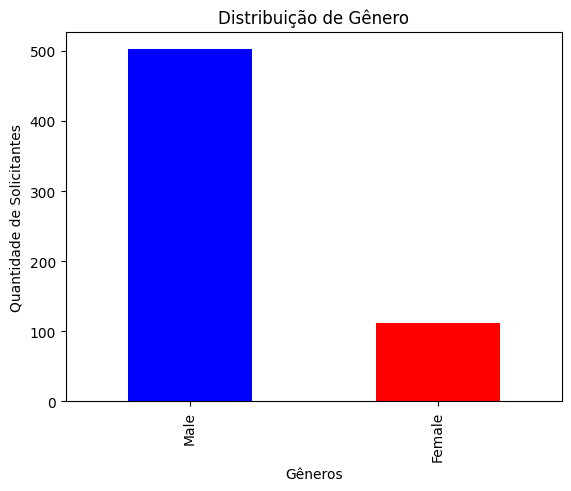

In [ ]:
# Criação de gráfico para a distribuição de gêneros
df["Gender"].value_counts().plot(                                               # Calcula a quantidade de solicitantes e plota em um gráfico
    kind="bar",                                                                 # Define o tipo do gráfico como gráfico de barras
    color=["blue", "red"])                                                      # Define as cores para cada categoria
plt.title("Distribuição de Gênero")                                             # Adiciona um título ao gráfico
plt.ylabel("Quantidade de Solicitantes")                                        # Adiciona uma legenda no eixo Y
plt.xlabel("Gêneros")                                                           # Adiciona uma legenda no eixo X
plt.show()                                                                      # Exibe o gráfico

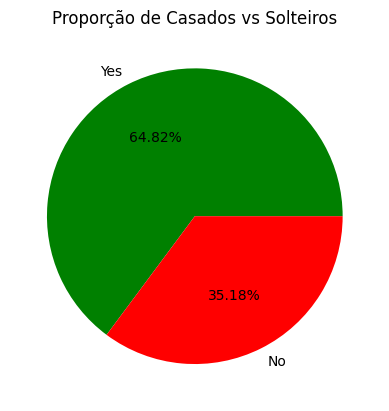

In [ ]:
# Criação de gráfico para a proporção de casados e solteiros
df["Married"].value_counts().plot(                                              # Calcula a quantidade de solicitantes e plota em um gráfico
    kind="pie",                                                                 # Define o tipo do gráfico como gráfico de pizza
    autopct="%1.2f%%",                                                          # Ajusta o ângulo inicial
    colors=["green", "red"])                                                    # Define as cores para cada categoria
plt.title("Proporção de Casados vs Solteiros")                                  # Adiciona um título ao gráfico
plt.ylabel("")                                                                  # Adiciona uma legenda vazia ao eixo Y
plt.show()                                                                      # Exibe o gráfico

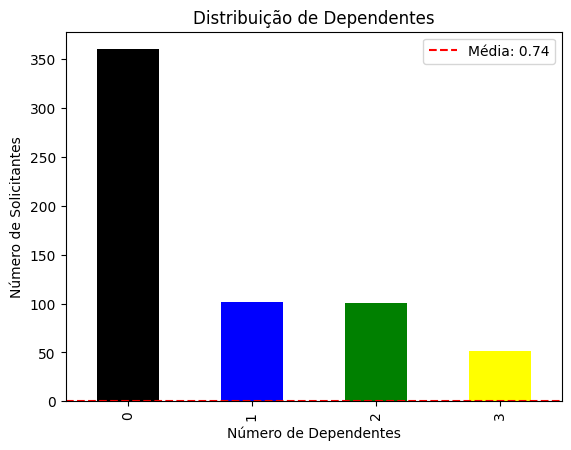

In [ ]:
# Criação de gráfico para a distribuição de dependentes por solicitantes
df["Dependents"].value_counts().plot(                                           # Calcula a quantidade de solicitantes e plota em um gráfico
    kind="bar",                                                                 # Define o tipo do gráfico como gráfico de barras
    color=["black", "blue", "green", "yellow"],                                 # Define as cores para cada categoria
    legend=False)                                                               # Remove a legenda padrão
plt.title("Distribuição de Dependentes")                                        # Adiciona um título ao gráfico
plt.ylabel("Número de Solicitantes")                                            # Adiciona uma legenda no eixo Y
plt.xlabel("Número de Dependentes")                                             # Adiciona uma legenda no eixo X

linha_media = plt.axhline(                                                      # Adiciona linha de média dos números dependente por solicitante
    media,                                                                      # Valor da média previamente calculada
    color="red",                                                                # Define a cor da linha
    linestyle="--",                                                             # Define o estilo como linha tracejada
    label=f"Média: {media:.2f}")                                                # Adiciona valor da média com duas casas decimais no rótulo da legenda
plt.legend(handles=[linha_media])                                               # Exibe a legenda com o valor da média

plt.show()                                                                      # Exibe o gráfico

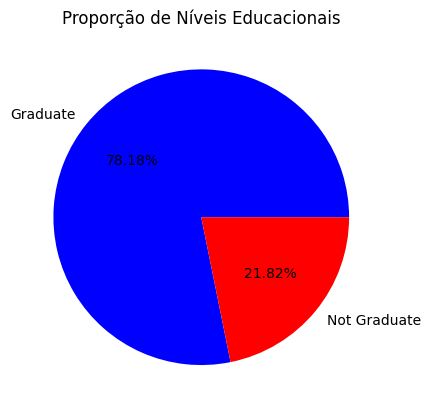

In [ ]:
# Criação de gráfico para a proporção de níveis educacionais
df["Education"].value_counts().plot(                                            # Calcula a quantidade de solicitantes e plota em um gráfico
    kind="pie",                                                                 # Define o tipo do gráfico como gráfico de pizza
    autopct="%1.2f%%",                                                          # Ajusta o ângulo inicial
    colors=["blue", "red"])                                                     # Define as cores para cada categoria
plt.title("Proporção de Níveis Educacionais")                                  # Adiciona um título ao gráfico
plt.ylabel("")                                                                  # Adiciona uma legenda vazia ao eixo Y
plt.show()                                                                      # Exibe o gráfico

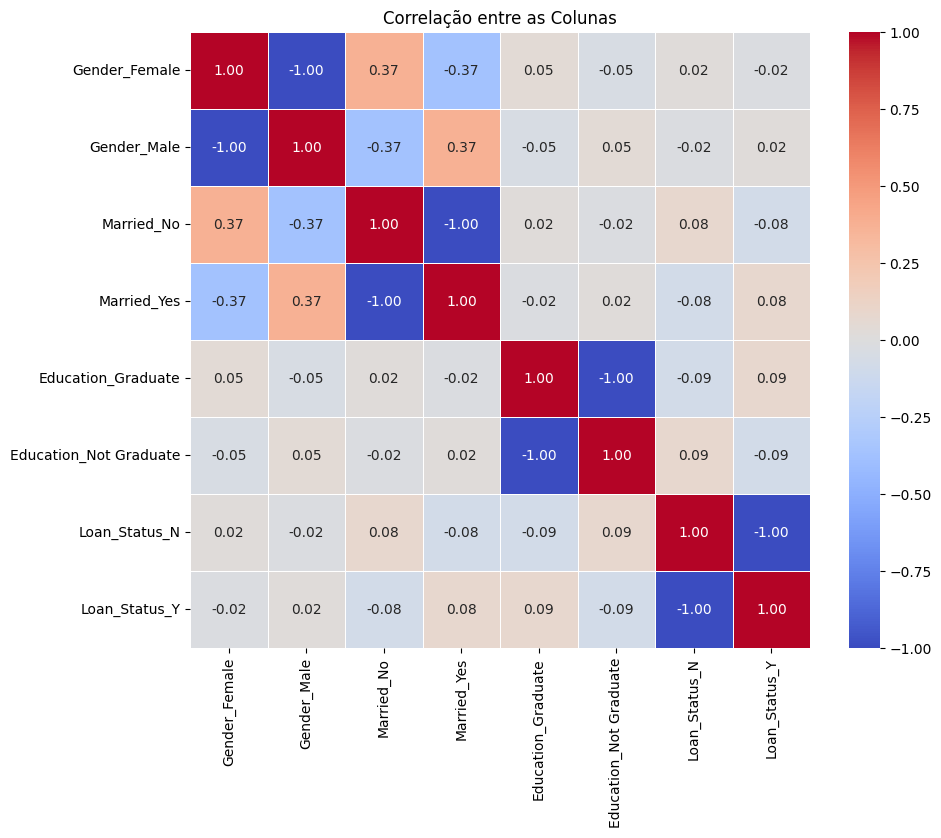

In [ ]:
# Criação do Heatmap para análise de correlação entre as colunas
df_dummies = pd.get_dummies(                                                    # Converte colunas categóricas (que possuem objects) em colunas binárias (0, 1)
    df[["Gender", "Married", "Education", "Loan_Status"]]).astype(int)          # Colunas selecionadas e transformadas para o tipo inteiro

heatmap = df.copy()                                                             # Realiza uma cópia do DataFrame para evitar modificações no mesmo
heatmap = pd.concat([heatmap, df_dummies], axis=1)                              # Concatena as colunas binárias no novo Dataframe para análise de correlação
heatmap.drop(                                                                   # Remove as colunas categóricas originais para evitar redundância
    ["Gender", "Married", "Education", "Loan_Status", "Dependents"],
    axis=1,                                                                     # Define que a remoção deve ser feita nas colunas
    inplace=True)                                                               # Aplica a remoção diratemnte no DataFrame
heatmap = heatmap.corr()                                                        # Calcula a matriz de correlação entre as colunas

plt.figure(figsize=(10, 8))                                                     # Define o tamanho do gráfico
sns.heatmap(                                                                    # Define o tipo do gráfico como heatmap
    heatmap,                                                                    # Matriz de correlação calculada anteriomente
    annot=True,                                                                 # Exibe valores numéricos dentro do mapa
    cmap="coolwarm",                                                            # Define a paleta de cores
    fmt=".2f",                                                                  # Define o formato dos números como duas casas decimais
    linewidths=0.5)                                                             # Define a espessura das linhas
plt.title("Correlação entre as Colunas")                                        # Adiciona um título ao gráfico
plt.show()                                                                      # Exibe o gráfico

## **Resultados**

Com base nas análises e visualizações de dados, alguns resultados significativos foram observados:

**Distribuição por Gênero:**

Apesar da grande diferença na solicitação de empréstimos entre homens e mulheres, a relação entre o gênero e a aprovação de empréstimo é baixa, o que indica que o gênero **não tem um impacto relevante na aprovação**. Entretanto, homens parecem ter uma leve vantagem.

**Proporção de Casados vs Solteiros:**

A situação civil pode impactar na aprovação. Pessoas casadas têm maior probabilidade de serem aprovadas em relação aos solteiros, pois possuem uma rede de apoio mais consolidada.

**Distribuição de Dependentes:**

A maior parte dos solicitantes tem de 0 a 2 dependentes, indicando que pessoas com mais dependentes podem ter um maior grau de reprovação, pois podem ter mais responsabilidades financeiras.

**Proporção de Níveis Educacionais:**

Solicitantes com maior nível educacional têm mais chances de conseguir o empréstimo, enquanto quem não possui ensino superior tem menos chances.





## **Conclusão**

Foi possível identificar alguns fatores importantes para a aprovação de empréstimos. **A educaçãoe o estado civil são aspectos relevantes** na análise de crédito. Pessoas com ensino superior e casadas têm mais chances de aprovação, o que pode indicar uma desatenção em relação aos grupos de baixa renda, uma vez que para conseguir um diploma superior e realizar um casamento legal exigem condições financeiras consideráveis.

Embora o impacto do fator gênero para a aprovação seja baixo, a **diferença na solicitação de crédito entre os gêneros é notável**, com mais homens solicitando empréstimos. Isso sugere que o número reduzido de mulheres solicitando crédito pode estar relacionado à falta de campanhas de marketing, que talvez não estejam alcançando o público feminino de maneira adequada, resultando em um desconhecimento sobre os produtos e opções disponíveis.

Contudo, vale ressaltar que essas conclusões são fundamentadas nos **dados utilizados**, para uma análise completa, outros fatores como renda, histórico de crédito e valor de empréstimo, devem ser analisados.
